<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Vital_ECG_4_sep_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

!pip install pyvital vitaldb vital
!pip install neurokit2
import vitaldb
import pandas as pd
import numpy as np

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # Load clinical data
df_trks = pd.read_csv('https://api.vitaldb.net/trks')  # Load track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # Load lab result

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.4 MB/s eta 0:00:00
  Created wheel for svix: filename=svix-0.41.2-py3-none-any.whl 

In [2]:
# inclusion / exclusion criteria
caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'SNUADC/ECG_II', 'caseid'])&
    set(df_trks.loc[df_trks['tname'] == 'SNUADC/ART', 'caseid'])
)

print('Total {} cases found'.format(len(caseids)))

Total 3644 cases found


In [ ]:
caseids

In [22]:
import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()



srate = 100
vals = vitaldb.load_case(caseids[0], ['SNUADC/ECG_II','SNUADC/ART'], 1 / srate)

main_signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]

ecg_sliced = signal[110000:111000]#vals[110000:111000, 0]

#Neurokit

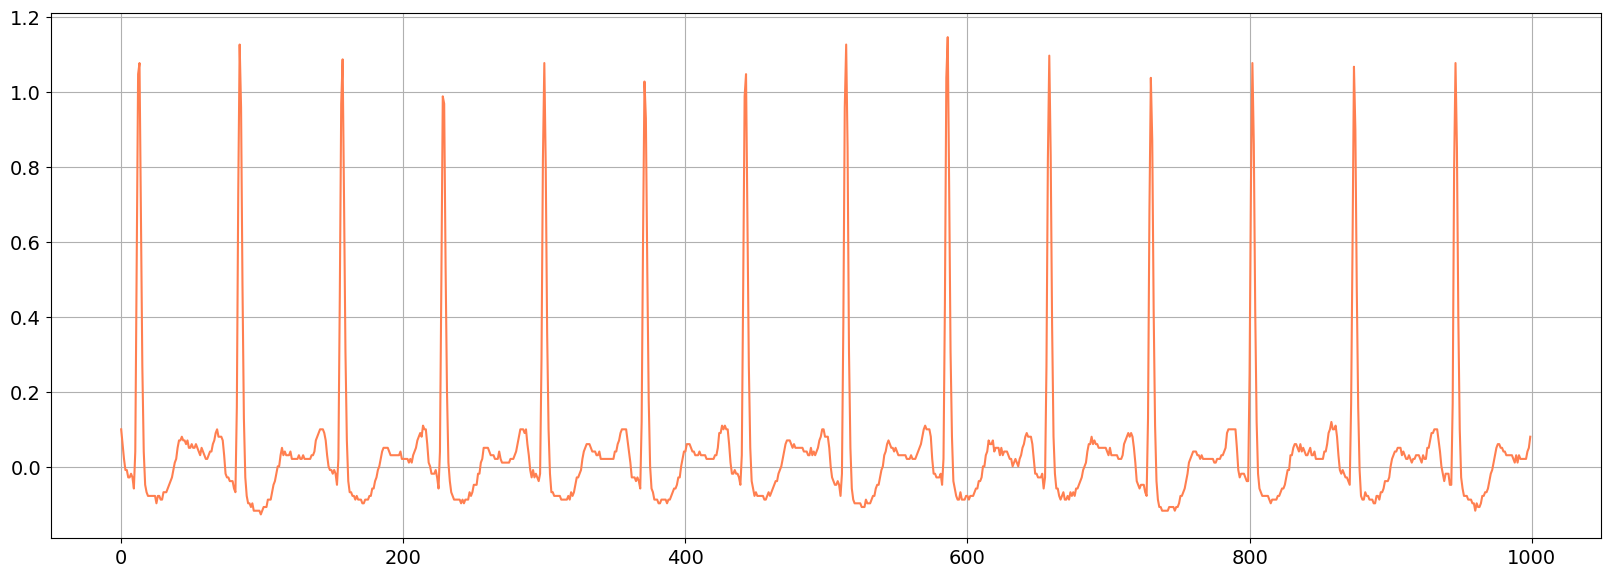

After Cleaning


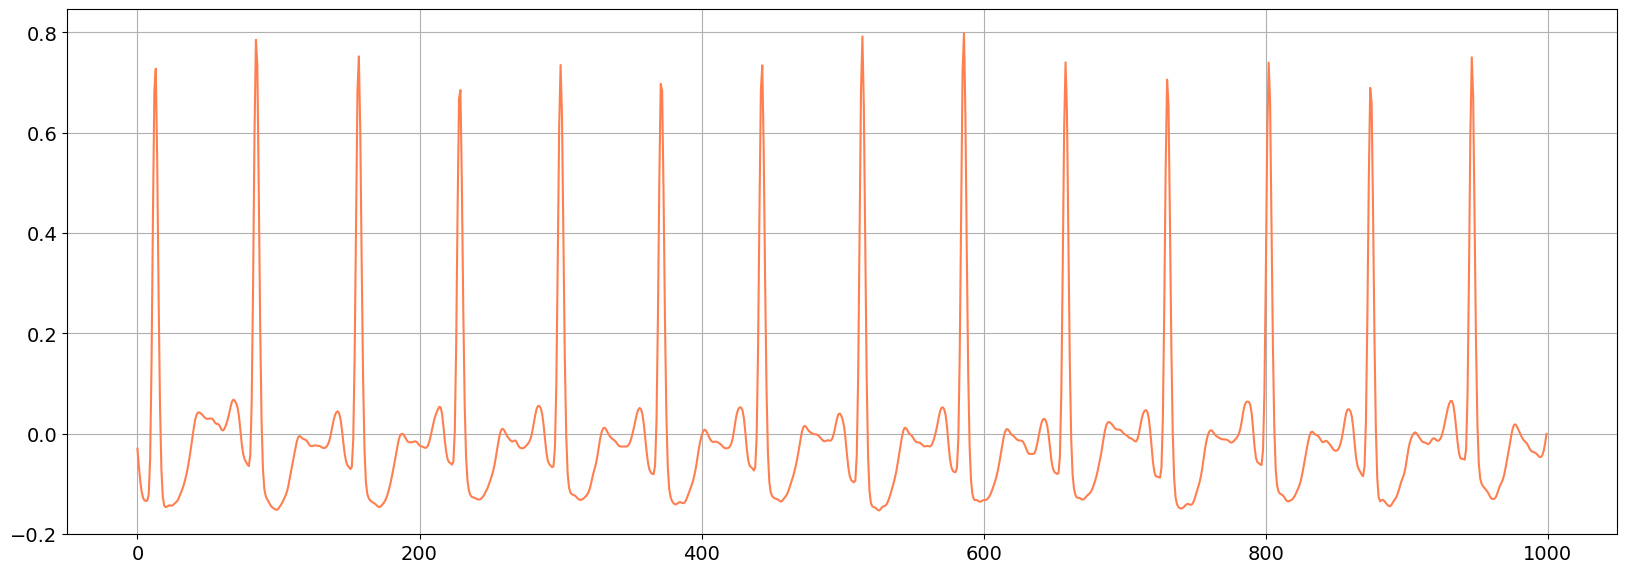

In [23]:
nrml_plt(ecg_sliced)
print("After Cleaning")
neurokit_filtered_ecg = nk.ecg_clean(ecg, sampling_rate=srate)
nrml_plt(neurokit_filtered_ecg)


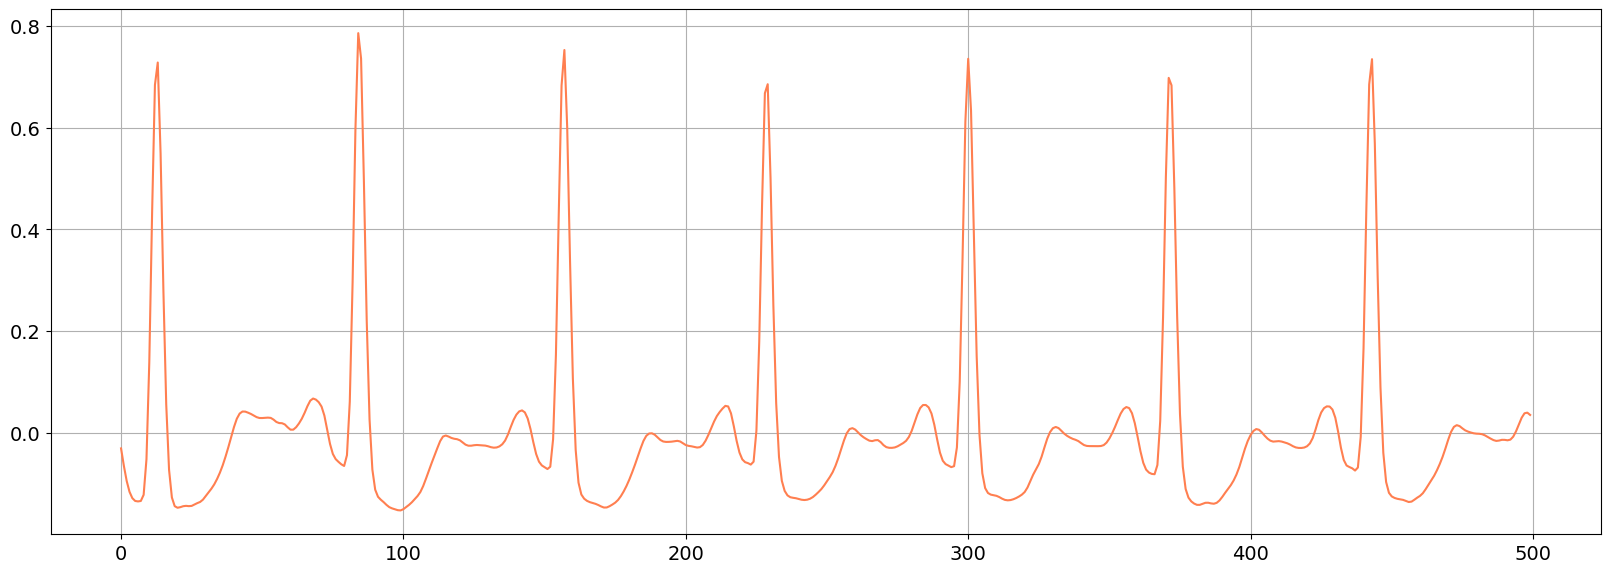

In [25]:
nrml_plt(neurokit_filtered_ecg[0:500])

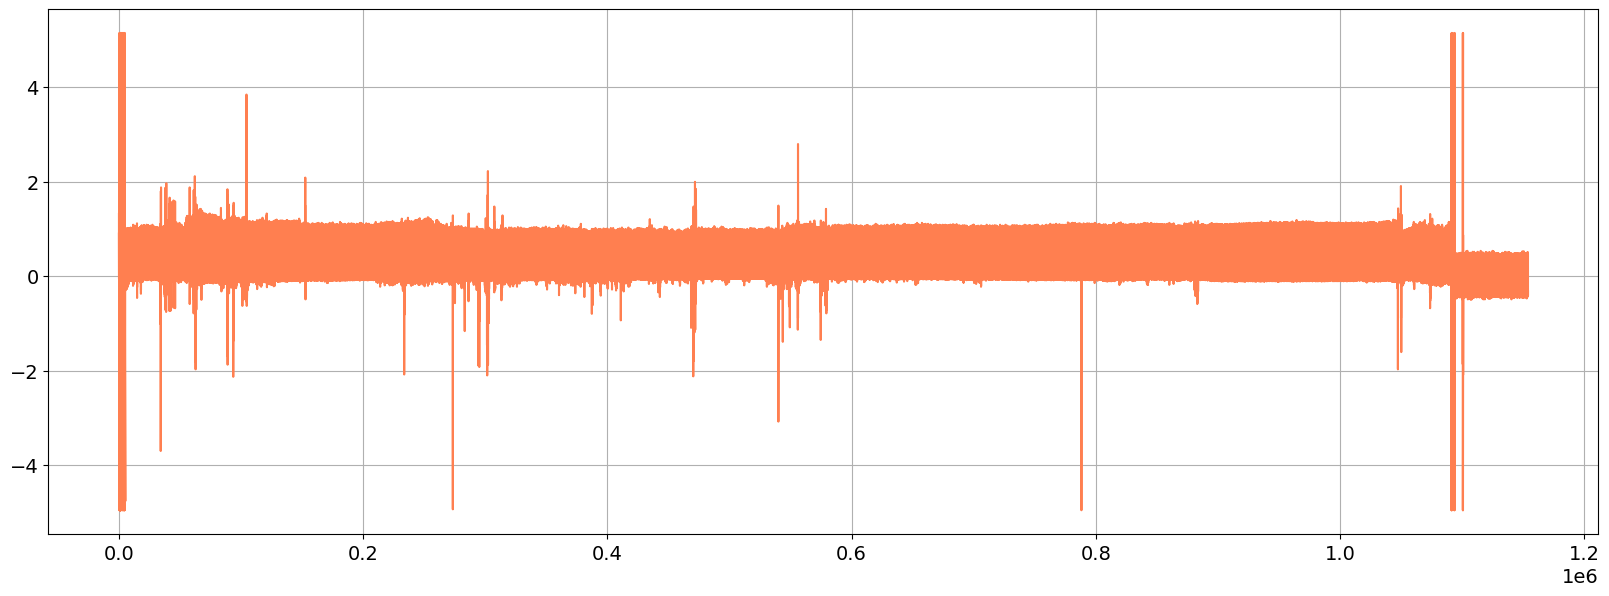

In [26]:

nrml_plt(main_signal)

#heartpy

In [14]:
!pip install heartpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.5 MB/s eta 0:00:00


In [18]:
import heartpy as hp

In [27]:
filtered = hp.filter_signal(main_signal, cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')

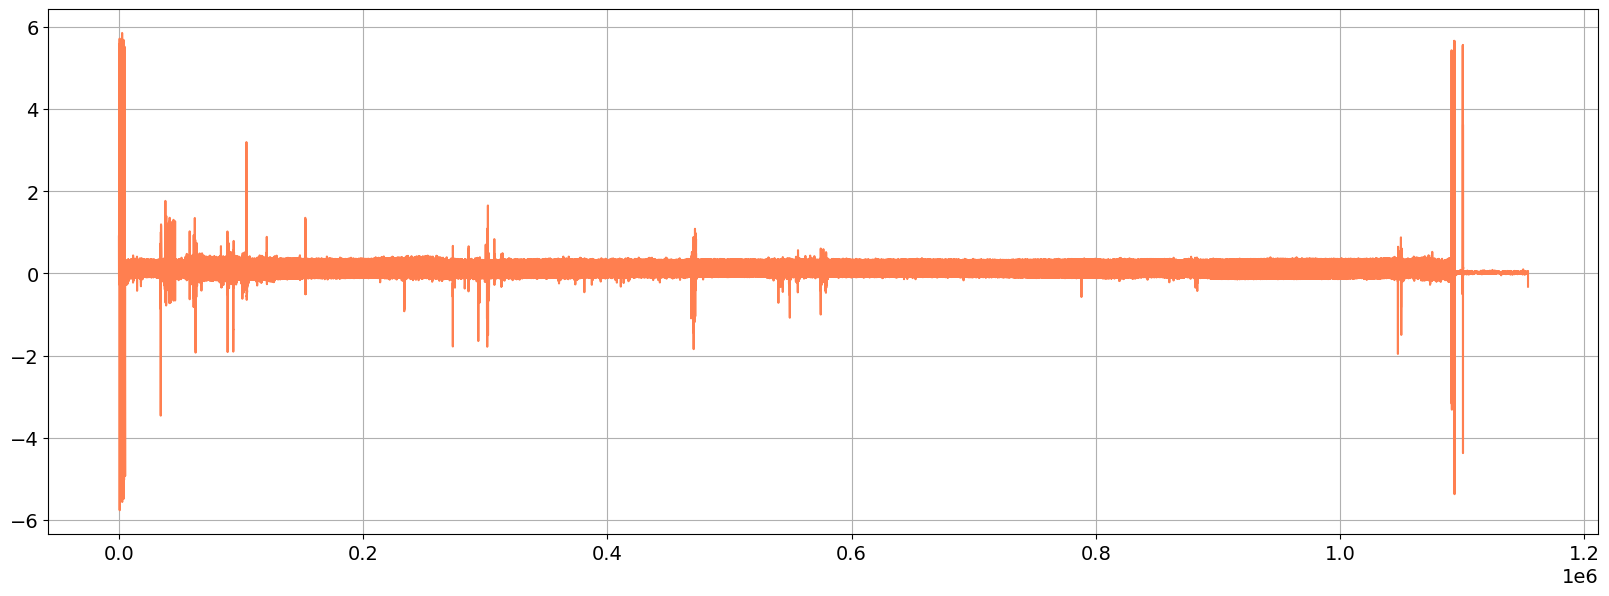

In [28]:

nrml_plt(filtered)